In [1]:
from astropy.table import Table

import numpy as np

import matplotlib.pyplot as plt

# Table of the counted Supernovae

In [2]:
SNratetb = Table.read('../JuanGarciaVega_2021/SN_withPetroFlux_08042021_rabsmag.txt', 
                      format = 'ascii.commented_header')
SNratetb[:5]

event,alias,catalog,claimedtype,dec,discoverdate,discoverer,download,ebv,host,hostdec,hostoffsetang,hostoffsetdist,hostra,instruments,lumdist,maxabsmag,maxappmag,maxdate,name,photolink,ra,radiolink,redshift,references,spectralink,velocity,xraylink,z,uflux,uflux_ivar,gflux,gflux_ivar,rflux,rflux_ivar,iflux,iflux_ivar,zflux,zflux_ivar,umag,umag_er,gmag,gmag_er,rmag,rmag_er,imag,imag_er,zmag,zmag_er,Rgal,vflag,rabsmag
str23,str140,str3,str10,float64,str10,str79,str1,float64,str65,str48,float64,float64,str33,str142,float64,float64,float64,str10,str23,str16,float64,int64,str27,str99,str13,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
ASASSN-13dn,"ASASSN-13dn,CSS140102:125258+322506",sne,II,32.41925,2013/12/15,ASAS-SN,--,0.0129,SDSS J125258.03+322444.3,+32:24:44.3,21.42,10.19,12:52:58.03,--,102.68,-19.333,15.7,2013/12/14,ASASSN-13dn,"1,0",193.2425,--,0.022805,"2013ATel.5665....1S,2016A&A...594A..13P,2013ATel.5667....1M,2011ApJ...737..103S",--,6758.8,--,0.022805,57.79485,0.01211324,289.8477,0.02161896,397.9104,0.04201692,365.166,0.005848842,227.4242,0.0005445918,18.09527,0.1706868,16.34458,0.02547633,16.00054,0.01331149,16.09377,0.03887754,16.6079,0.2045704,68.06171417236328,0,-18.348260828109954
ASASSN-14az,"ASASSN-14az,Gaia14age,MLS140831:234448-020701",sne,IIb,-2.117547222222222,2014/05/20,ASAS-SN,e,0.0274,"PGC 1101367,GALEXASC J234448.27-020653.4",-02:06:53.4,8.94,1.28,23:44:48.27,"C, u, g, r, R, i",29.943,-16.734,15.64,2014/07/22,ASASSN-14az,"25,-36.1,67",356.2,--,0.006731,"2009ApJ...696..870D,2014ATel.6151....1D,2014ATel.6185....1B,2016A&A...594A..13P,2011ApJ...737..103S","1,-53.1",2011.0,--,0.006731,105.3499,0.01638733,276.2211,0.1078128,393.7222,0.04989673,465.4725,0.01249947,393.5354,0.0007667065,17.44341,0.08050719,16.39686,0.01197105,16.01203,0.01234521,15.83027,0.02086336,16.01254,0.09963752,20.152389526367188,9,-15.652880237784276
ASASSN-14bu,ASASSN-14bu,sne,II,25.166633333333333,2014/05/29,ASAS-SN,--,0.0139,SDSS J111840.97+250958.5,+25:09:58.5,1.48,0.784,11:18:40.97,--,114.6,-18.17,17.1,2014/05/28,ASASSN-14bu,"1,0",169.67095833333335,--,0.0254,"2014ATel.6169....1B,2014ATel.6196....1D,2016A&A...594A..13P,2011ApJ...737..103S",--,7520.0,--,0.0254,22.2714,0.1204268,53.14648,0.8450133,74.92245,0.3735397,89.48361,0.1353606,96.55038,0.009277737,19.13059,0.1404691,18.18631,0.02222366,17.81347,0.02371056,17.62064,0.03297852,17.53805,0.1167343,75.767333984375,0,-16.71989451468687
ASASSN-15bd,ASASSN-15bd,sne,IIb,16.610583333333334,2015/01/08,ASAS-SN,--,0.0294,SDSS J155438.39+163637.6,+16:36:37.6,1.08,0.182,15:54:38.39,--,35.38,-16.535,16.2,2015/01/28,ASASSN-15bd,"1,0",238.65970833333333,--,0.007946,"2015ATel.6945....1K,2016A&A...594A..13P,2015ATel.6956....1C,2011ApJ...737..103S",--,2373.0,--,0.007946,82.5851,0.1384537,164.0936,0.8550192,233.7789,0.3454179,257.4846,0.1057257,258.7754,0.01085449,17.70774,0.03533197,16.96227,0.007155575,16.57799,0.007902169,16.47312,0.01296828,16.46768,0.04027074,23.784515380859375,1,-15.481901638954104
ASASSN-15ik,ASASSN-15ik,sne,IIn,3.500738888888889,2015/05/11,ASAS-SN,--,0.0469,SDSS J110204.81+033003.1,+03:30:03.1,1.46,1.05,11:02:04.81,--,158.1,-19.36,16.6,2015/05/10,ASASSN-15ik,"1,0",165.51979166666666,--,0.0348,"2015ATel.7491....1B,2016A&A...594A..13P,2015ATel.7497....1C,2011ApJ...737..103S",--,10300.0,--,0.0348,20.4322,0.3889205,48.35931,1.340777,63.42532,0.6906829,71.69273,0.3366273,67.40577,0.02625342,19.22416,0.08519968,18.2888,0.01938934,17.99434,0.02059772,17.86131,0.02610172,17.92813,0.099387,103.61311340332031,2,-17.191689745580653


In [3]:
def plot_radec(ra, dec, vflag, sizes=10):
    """Mollweide projection plot adapted to astro coordinates.
    
    Parameters
    ----------
    ra : pandas.Series or list
        List of candidate RA [deg].
    dec : pandas.Series or list
        List of candidate Dec [deg].
    
    Returns
    -------
    fig : matplotlib.Figure
        Figure object to let user apply further plot manipulation.
    """
    # Convert RA, Dec to radians.
    # Rotate the RA so that the plot goes 360->0 left to right.
    _ra = np.radians(180. - ra)
    _dec = np.radians(dec)

    fig, ax = plt.subplots(1,1, figsize=(10,5), subplot_kw={'projection': 'mollweide'})
    
    ax.scatter(_ra[vflag==9], _dec[vflag==9], s=sizes, c='g', alpha=0.5, label='outside')
    ax.scatter(_ra[vflag==2], _dec[vflag==2], s=sizes, c='b', alpha=0.5, label='edge')
    ax.scatter(_ra[vflag==0], _dec[vflag==0], s=sizes*2.5, c='k', alpha=0.5, label='wall')
    ax.scatter(_ra[vflag==1], _dec[vflag==1], s=sizes*2.5, c='r', alpha=0.5, label='void')

    ax.set(xticks=np.radians([-150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150]),
           xticklabels=['22h', '20h', '18h', '16h', '14h', '12h', '10h', '8h', '6h', '4h', '2h'])
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16, labelcolor='w')
    ax.legend(fontsize=12, loc='lower right')
    ax.grid(ls=':')
    fig.tight_layout()
    
    #return fig;

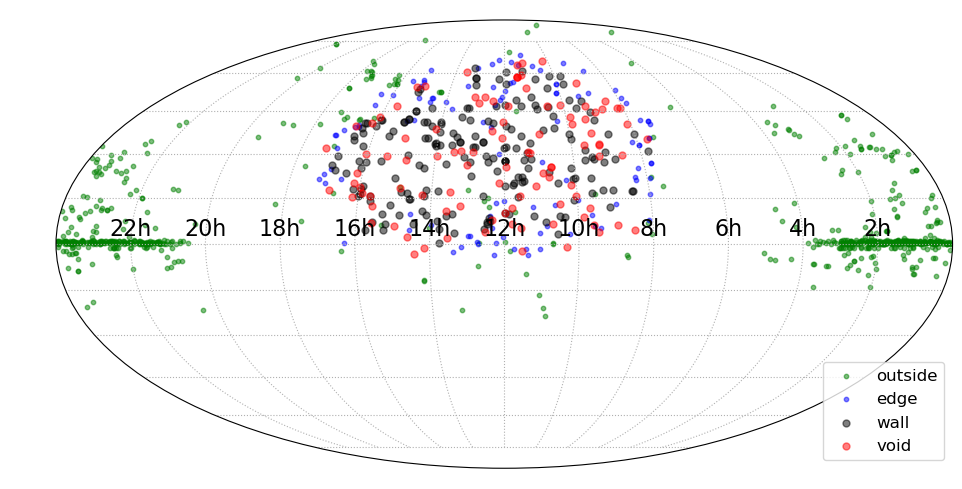

In [4]:
plot_radec(SNratetb['ra'], SNratetb['dec'], SNratetb['vflag'])

# Whole Galaxy file

In [6]:
galSNr_tb = Table.read('../../data/NSA_v1_0_1_VAGC_vflag-V2-VF_updated.fits')

galSNr_tb[:5]

IAUNAME,SUBDIR,RA,DEC,ISDSS,INED,ISIXDF,IALFALFA,IZCAT,ITWODF,MAG,Z,ZSRC,SIZE,RUN,CAMCOL,FIELD,RERUN,XPOS,YPOS,NSAID,ZDIST,SERSIC_NMGY,SERSIC_NMGY_IVAR,SERSIC_OK,SERSIC_RNMGY,SERSIC_ABSMAG,SERSIC_AMIVAR,EXTINCTION,SERSIC_KCORRECT,SERSIC_KCOEFF,SERSIC_MTOL,SERSIC_B300,SERSIC_B1000,SERSIC_METS,SERSIC_MASS,XCEN,YCEN,NPROF,PROFMEAN,PROFMEAN_IVAR,QSTOKES,USTOKES,BASTOKES,PHISTOKES,PETRO_FLUX,PETRO_FLUX_IVAR,FIBER_FLUX,FIBER_FLUX_IVAR,PETRO_BA50,PETRO_PHI50,PETRO_BA90,PETRO_PHI90,SERSIC_FLUX,SERSIC_FLUX_IVAR,SERSIC_N,SERSIC_BA,SERSIC_PHI,ASYMMETRY,CLUMPY,DFLAGS,AID,PID,DVERSION,PROFTHETA,PETRO_THETA,PETRO_TH50,PETRO_TH90,SERSIC_TH50,PLATE,FIBERID,MJD,RACAT,DECCAT,ZSDSSLINE,SURVEY,PROGRAMNAME,PLATEQUALITY,TILE,PLUG_RA,PLUG_DEC,ELPETRO_BA,ELPETRO_PHI,ELPETRO_FLUX_R,ELPETRO_FLUX_IVAR_R,ELPETRO_THETA_R,ELPETRO_TH50_R,ELPETRO_TH90_R,ELPETRO_THETA,ELPETRO_FLUX,ELPETRO_FLUX_IVAR,ELPETRO_TH50,ELPETRO_TH90,ELPETRO_APCORR_R,ELPETRO_APCORR,ELPETRO_APCORR_SELF,ELPETRO_NMGY,ELPETRO_NMGY_IVAR,ELPETRO_OK,ELPETRO_RNMGY,ELPETRO_ABSMAG,ELPETRO_AMIVAR,ELPETRO_KCORRECT,ELPETRO_KCOEFF,ELPETRO_MASS,ELPETRO_MTOL,ELPETRO_B300,ELPETRO_B1000,ELPETRO_METS,IN_DR7_LSS,u_r,g_r,NUV_r,index,imc,aimc,cd,conx1,u_r_KIAS,prmag,BPTclass,SFR,sSFR,HImass,flag3727,t3,Z12logOH,Zerr,N12logNH,NHerr,logNO,NOerr,Ne12logNeH,NeHerr,logNeO,NeOerr,Z_N2O2,vorvol,V2_depth,vflag_V2,vflag_VF,u_r_err,g_r_err,NUV_r_err
bytes19,bytes27,float64,float64,int32,int32,int32,int32,int32,int32,float32,float32,bytes7,float32,int16,uint8,int16,bytes3,float32,float32,int32,float32,float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[7],float32[5],float32[7],float32,float32,float32,float32,float64,float64,uint8[7],"float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]","float32[15,7]",float32[7],float32[7],float32[7],float32[7],float32,float32,float32,float32,float32[7],float32[7],float32,float32,float32,float32[7],float32[7],int32[7],int32,int32,bytes8,float32[15],float32,float32,float32,float32,int32,int16,int32,float64,float64,float32,bytes6,bytes27,bytes8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32[7],float32[7],float32[7],float32[7],float32,float32[7],float32[7],float32[7],float32[7],int16,float32[7],float32[7],float32[7],float32[7],float32[5],float32,float32[7],float32,float32,float32,float64,float32,float32,float32,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64
J094651.40-010228.5,09h/m00/J094651.40-010228.5,146.714215072841,-1.0412800233313741,0,72212,37354,-1,-1,-1,15.178774,0.021222278,sdss,0.07,756,1,206,301,136.2967,1095.152,0,0.020687785,29.696056 .. 3267.6895,0.29814342 .. 0.00012172792,1,31.368013 .. 3501.2527,-15.17281 .. -20.302134,223.03555 .. 1102.6129,0.4536473 .. 0.080934174,-0.005893635 .. 0.019576037,0.00017777947 .. 5.1533486e-11,0.00020792194 .. 0.98780394,2.7473723e-05,0.31195974,0.035135116,8898397000.0,215.39407348632812,213.4535369873047,10 .. 12,0.3149959 .. 0.0,233.37904 .. 0.0,0.062215745 .. -0.07950058,0.0006146176 .. -0.1274703,0.8828513 .. 0.7387829,0.2829979 .. -60.97547,18.203371 .. 2264.6604,1.9946122 .. 0.015697604,1.0260131 .. 561.97687,47.3397 .. 0.33574256,0.88909996,14.777527,0.80408496,17.367554,19.554192 .. 3146.785,1.0691423 .. 0.017162137,4.7761517,0.6651653,15.97821,-0.0109440535 .. 0.004525926,0.042470127 .. 0.042621203,0 .. 0,0,36,v2_1_13,0.22341923 .. 258.39,7.2478933,3.4641922,10.453795,5.882104,266,1,51630,146.71420341874853,-1.0412749124036818,0.0,sdss,legacy,good,122,146.71421,-1.0413043,0.80408496,17.367554,1144.0713,0.4582725,7.3913364,3.7061903,10.666219,7.3913364,18.787916 .. 2225.009,1.8480047 .. 0.017611798,5.8557696 .. 3.4004514,11.650886 .. 10.1460905,0.9986329,1.0687045 .. 1.001099,1.0695114 .. 1.0010818,28.532349 .. 2310.4973,0.42499655 .. 0.0002

# All

In [7]:
nSN_void = np.sum(SNratetb['vflag'] == 1)
nSN_void

102

In [8]:
nSN_wall = np.sum(SNratetb['vflag'] == 0)
nSN_wall

188

In [9]:
nGal_void = np.sum(galSNr_tb['vflag_VF'] == 1)
nGal_void

86891

In [10]:
nGal_wall = np.sum(galSNr_tb['vflag_VF'] == 0)
nGal_wall

245778

In [11]:
#ratio between the SN (from own results 1171 obj) in void and galaxies in a void. 
SNGAl_void = (nSN_void) / nGal_void 
SNGAl_void

0.0011738845219873173

In [12]:
#ratio between SN(from own results, 1171 obj) in a wall and galaxies in a wall.
SNGAL_wall = (nSN_wall) / (nGal_wall)
SNGAL_wall

0.0007649179340705841

# Dwarfs $M_r > -17$

In [13]:
DwarfSN_tb = SNratetb[SNratetb['rabsmag'] > -17]

In [14]:
nSN_wall_Dwrf = np.sum(DwarfSN_tb['vflag'] == 0)
nSN_wall_Dwrf

18

In [15]:
nSN_void_Dwrf = np.sum(DwarfSN_tb['vflag'] == 1)
nSN_void_Dwrf

20

In [16]:
DwarfSNgal_tb = galSNr_tb[galSNr_tb['ELPETRO_ABSMAG'][:,4] > -17]

In [17]:
ngal_wall_Dwrf = np.sum(DwarfSNgal_tb['vflag_VF'] == 0)
ngal_wall_Dwrf

3651

In [18]:
ngal_void_Dwrf = np.sum(DwarfSNgal_tb['vflag_VF'] == 1)
ngal_void_Dwrf

3617

In [19]:
# ratio of dwarfs (our results) and galaxies ---> <-17 ---->wall
DwSNGal_wall = (nSN_wall_Dwrf) / (ngal_wall_Dwrf)
DwSNGal_wall

0.0049301561216105174

In [20]:
#ratio of dwarfs (our results) and galaxies ---> <-17 ---->void
DwSNGal_void = nSN_void_Dwrf / ngal_void_Dwrf
DwSNGal_void

0.00552944429084877

# $-17 > M_r > -18$

In [21]:
SN1718_tb = SNratetb[(SNratetb['rabsmag'] < -17) & (SNratetb['rabsmag'] > -18)]

In [22]:
nSN_void_1718 = np.sum(SN1718_tb['vflag'] == 1)
print(nSN_void_1718)

6


In [23]:
nSN_wall_1718 = np.sum(SN1718_tb['vflag'] == 0)
print(nSN_wall_1718)

12


In [24]:
Gal1718_tb = galSNr_tb[(galSNr_tb['ELPETRO_ABSMAG'][:,4] < -17) & (galSNr_tb['ELPETRO_ABSMAG'][:,4] > -18)]

In [25]:
ngal_void_1718 = np.sum(Gal1718_tb['vflag_VF'] == 1)
ngal_void_1718

4915

In [26]:
ngal_wall_1718 = np.sum(Gal1718_tb['vflag_VF'] == 0)
ngal_wall_1718

9675

In [27]:
SNGal_1718_void = nSN_void_1718 / ngal_void_1718
SNGal_1718_void

0.0012207527975584944

In [28]:
SNGal_1718_wall = nSN_wall_1718 / ngal_wall_1718
SNGal_1718_wall

0.00124031007751938

# $-18 > M_r > -19$ 

In [29]:
SN1819_tb = SNratetb[(SNratetb['rabsmag'] < -18) & (SNratetb['rabsmag'] > -19)]

In [30]:
nSN_void_1819 = np.sum(SN1819_tb['vflag'] == 1)
nSN_void_1819

23

In [31]:
nSN_wall_1819 = np.sum(SN1819_tb['vflag'] == 0)
nSN_wall_1819

28

In [32]:
Gal1819_tb = galSNr_tb[(galSNr_tb['ELPETRO_ABSMAG'][:,4] < -18) & (galSNr_tb['ELPETRO_ABSMAG'][:,4] > -19)]

In [33]:
ngal_void_1819 = np.sum(Gal1819_tb['vflag_VF'] == 1)
ngal_void_1819

12379

In [34]:
ngal_wall_1819 = np.sum(Gal1819_tb['vflag_VF'] == 0)
ngal_wall_1819

24886

In [35]:
SNGal_1819_void = nSN_void_1819 / ngal_void_1819
SNGal_1819_void

0.0018579852976815575

In [36]:
SNGal_1819_wall = nSN_wall_1819 / ngal_wall_1819
SNGal_1819_wall

0.001125130595515551

# $ -19 > M_r > -20 $

In [37]:
SN1920_tb = SNratetb[(SNratetb['rabsmag'] < -19) & (SNratetb['rabsmag'] > -20)]

In [38]:
nSN_void_1920 = np.sum(SN1920_tb['vflag'] == 1)
nSN_void_1920

21

In [39]:
nSN_wall_1920 = np.sum(SN1920_tb['vflag'] == 0)
nSN_wall_1920

41

In [40]:
Gal1920_tb = galSNr_tb[(galSNr_tb['ELPETRO_ABSMAG'][:,4] < -19) & (galSNr_tb['ELPETRO_ABSMAG'][:,4] > -20)]

In [41]:
ngal_void_1920 = np.sum(Gal1920_tb['vflag_VF'] == 1)
ngal_void_1920

28931

In [42]:
ngal_wall_1920 = np.sum(Gal1920_tb['vflag_VF'] == 0)
ngal_wall_1920

73202

In [43]:
SNGal_1920_void = nSN_void_1920 / ngal_void_1920
SNGal_1920_void

0.0007258649891120251

In [44]:
SNGal_1920_wall = nSN_wall_1920 / ngal_wall_1920
SNGal_1920_wall

0.000560093986503101

# $ M_r < -20 $

In [45]:
DwarfSN_20 = SNratetb[SNratetb['rabsmag'] < -20]

In [46]:
DwarfSN_Void_20 = np.sum(DwarfSN_20['vflag'] == 1)
DwarfSN_Void_20

32

In [47]:
DwarfSN_Wall_20 = np.sum(DwarfSN_20['vflag'] == 0)
DwarfSN_Wall_20

89

In [48]:
galSN_20 = galSNr_tb[galSNr_tb['ELPETRO_ABSMAG'][:,4] < -20]

In [49]:
gal_void20 = np.sum(galSN_20['vflag_VF'] == 1)
gal_void20

37045

In [50]:
gal_Wall20 = np.sum(galSN_20['vflag_VF'] == 0)
gal_Wall20

134359

In [51]:
galDWSN_20void = DwarfSN_Void_20 / gal_void20
galDWSN_20void

0.0008638142799298151

In [52]:
galDWSN_20wall = DwarfSN_Wall_20 / gal_Wall20
galDWSN_20wall

0.0006624044537396081

# Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


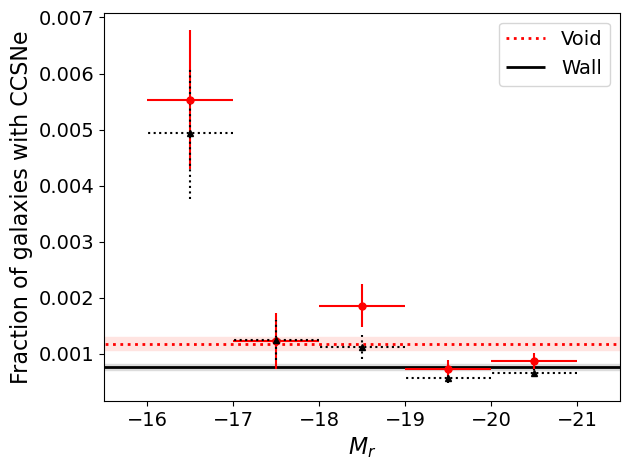

In [80]:
plt.figure(tight_layout=True)

# Overall SNe rates: void
plt.fill_between([-15, -25], 
                 [SNGAl_void + SNGAl_void*np.sqrt((1/nSN_void) + (1/nGal_void))], 
                 [SNGAl_void - SNGAl_void*np.sqrt((1/nSN_void) + (1/nGal_void))], 
                 color='mistyrose')
plt.hlines(SNGAl_void, -15, -25, colors='r', linewidth=2, linestyle='dotted', label='Void')

# Overall SNe rates: wall
plt.fill_between([-15, -25], 
                 [SNGAL_wall + SNGAL_wall*np.sqrt((1/nSN_wall) + (1/nGal_wall))], 
                 [SNGAL_wall - SNGAL_wall*np.sqrt((1/nSN_wall) + (1/nGal_wall))], 
                 color='gainsboro')
plt.hlines(SNGAL_wall, -15, -25, colors='k', linewidth=2, label='Wall')

fSN_void = np.array([DwSNGal_void, SNGal_1718_void, SNGal_1819_void, SNGal_1920_void, galDWSN_20void])
SN_void = np.array([nSN_void_Dwrf, nSN_void_1718, nSN_void_1819, nSN_void_1920, DwarfSN_Void_20])
gal_void = np.array([ngal_void_Dwrf, ngal_void_1718, ngal_void_1819, ngal_void_1920, gal_void20])

# SNe rates by magnitude bin: void
plt.errorbar([-16.5, -17.5, -18.5, -19.5, -20.5], 
             fSN_void, 
             xerr=[0.5, 0.5, 0.5, 0.5, 0.5], 
             yerr=fSN_void*np.sqrt((1/SN_void) + (1/gal_void)), 
             fmt='o', 
             color='r', 
             markersize=5)

fSN_wall = np.array([DwSNGal_wall, SNGal_1718_wall, SNGal_1819_wall, SNGal_1920_wall, galDWSN_20wall])
SN_wall = np.array([nSN_wall_Dwrf, nSN_wall_1718, nSN_wall_1819, nSN_wall_1920, DwarfSN_Wall_20])
gal_wall = np.array([ngal_wall_Dwrf, ngal_wall_1718, ngal_wall_1819, ngal_wall_1920, gal_Wall20])

# SNe rates by magnitude bin: wall
wall_eb = plt.errorbar([-16.5, -17.5, -18.5, -19.5, -20.5], 
                       fSN_wall, 
                       xerr=[0.5, 0.5, 0.5, 0.5, 0.5], 
                       yerr=fSN_wall*np.sqrt((1/SN_wall) + (1/gal_wall)), 
                       fmt='^', 
                       color='k', 
                       markersize=5)
wall_eb[-1][0].set_linestyle(':')
wall_eb[-1][1].set_linestyle(':')

plt.xlim([-15.5, -21.5])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('$M_r$', fontsize=16)
plt.ylabel(r'Fraction of galaxies with CCSNe', fontsize=16)

plt.legend(fontsize=14)

plt.savefig('figures/SNe_rates.eps');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


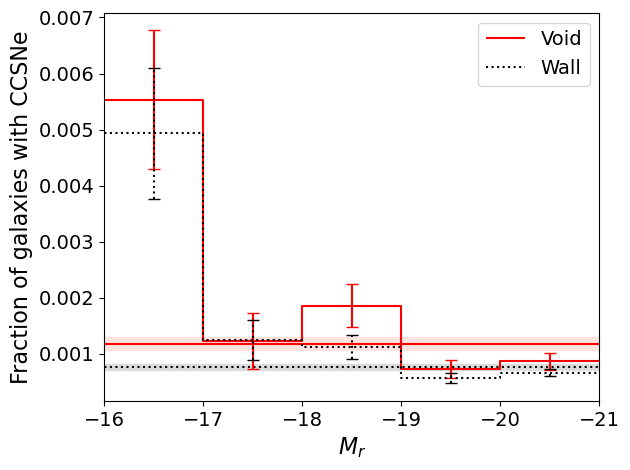

In [94]:
plt.figure(tight_layout=True)

# Overall SNe rates: void
plt.fill_between([-15, -25], 
                 [SNGAl_void + SNGAl_void*np.sqrt((1/nSN_void) + (1/nGal_void))], 
                 [SNGAl_void - SNGAl_void*np.sqrt((1/nSN_void) + (1/nGal_void))], 
                 color='mistyrose')
plt.hlines(SNGAl_void, -15, -25, colors='r', label='Void')

# Overall SNe rates: wall
plt.fill_between([-15, -25], 
                 [SNGAL_wall + SNGAL_wall*np.sqrt((1/nSN_wall) + (1/nGal_wall))], 
                 [SNGAL_wall - SNGAL_wall*np.sqrt((1/nSN_wall) + (1/nGal_wall))], 
                 color='gainsboro')
plt.hlines(SNGAL_wall, -15, -25, colors='k', linestyle='dotted', label='Wall')

fSN_void = np.array([DwSNGal_void, SNGal_1718_void, SNGal_1819_void, SNGal_1920_void, galDWSN_20void])
SN_void = np.array([nSN_void_Dwrf, nSN_void_1718, nSN_void_1819, nSN_void_1920, DwarfSN_Void_20])
gal_void = np.array([ngal_void_Dwrf, ngal_void_1718, ngal_void_1819, ngal_void_1920, gal_void20])

# SNe rates by magnitude bin: void
plt.step([-15, -16.5, -17.5, -18.5, -19.5, -20.5, -22], 
         [fSN_void[0], *fSN_void, fSN_void[-1]], 
         'r',
         where='mid')
plt.errorbar([-16.5, -17.5, -18.5, -19.5, -20.5], 
             fSN_void, 
             yerr=fSN_void*np.sqrt((1/SN_void) + (1/gal_void)), 
             linestyle='none',
             color='r', 
             capsize=4)

fSN_wall = np.array([DwSNGal_wall, SNGal_1718_wall, SNGal_1819_wall, SNGal_1920_wall, galDWSN_20wall])
SN_wall = np.array([nSN_wall_Dwrf, nSN_wall_1718, nSN_wall_1819, nSN_wall_1920, DwarfSN_Wall_20])
gal_wall = np.array([ngal_wall_Dwrf, ngal_wall_1718, ngal_wall_1819, ngal_wall_1920, gal_Wall20])

# SNe rates by magnitude bin: wall
plt.step([-15, -16.5, -17.5, -18.5, -19.5, -20.5, -22], 
         [fSN_wall[0], *fSN_wall, fSN_wall[-1]], 
         'k:',
         where='mid')
wall_eb = plt.errorbar([-16.5, -17.5, -18.5, -19.5, -20.5], 
                       fSN_wall, 
                       yerr=fSN_wall*np.sqrt((1/SN_wall) + (1/gal_wall)), 
                       linestyle='none',
                       color='k', 
                       capsize=4)
wall_eb[-1][0].set_linestyle(':')

plt.xlim([-16, -21])

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel('$M_r$', fontsize=16)
plt.ylabel(r'Fraction of galaxies with CCSNe', fontsize=16)

plt.legend(fontsize=14)

plt.savefig('figures/SNe_rates_hist.eps');